# **Import the required packages**

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense

In [6]:
#For data reading and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib


#For model building
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


#For evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler


# **Read and analyze data from csv file**

In [10]:
df=pd.read_csv("C:/Users/L/Downloads/Bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [12]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


# **Checking NaN values**

In [13]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

# **Visualizing data**

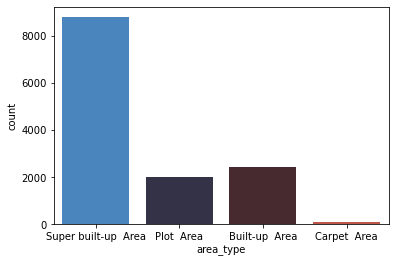

In [14]:
sns.countplot( x='area_type', data=df, palette="icefire");

<BarContainer object of 13320 artists>

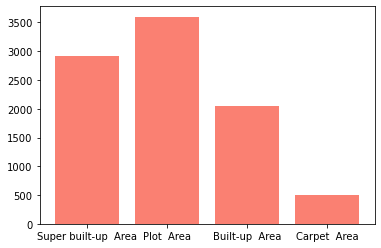

In [15]:
plt.bar(df.area_type,df.price,color=['salmon'])

In [16]:
#sns.scatterplot(df['society'],df['price'])

<AxesSubplot:>

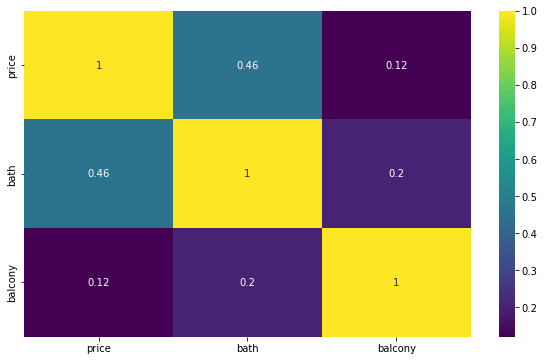

In [17]:
#Quality correlation matrix
k = 5 #number of variables for heatmap
cols = df.corr().nlargest(k, 'price')['price'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

# **Dropping the columns which won't influence our model much**

In [18]:
df.shape


(13320, 9)

In [19]:
df=df.drop(['area_type','availability','society'],axis=1)
df

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [20]:
df.isna().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [21]:
df=df.dropna()

In [22]:
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [23]:
df.shape

(12710, 6)

In [24]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


# **Creating a column named BHK**

In [25]:
df['BHK']= df['size'].apply(lambda x: int(x.split(' ')[0]))
df.head()

C:\Users\L\AppData\Local\Temp/ipykernel_3560/3277279279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BHK']= df['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [26]:
df=df.drop('size',axis=1)

In [27]:
df.shape

(12710, 6)

In [28]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

# **Preprocessing total sq.feet column**

In [29]:
def preprocess_sqft(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
        
        

df['total_sqft']=df['total_sqft'].apply(preprocess_sqft)

In [30]:
df.shape

(12710, 6)

In [24]:
df.total_sqft.head()
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True
df[~df['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,balcony,price,BHK


In [31]:
df[~df.total_sqft.notnull()]

,location,total_sqft,bath,balcony,price,BHK
410,Kengeri,NaN,1.0,0.0,18.50,1
775,Basavanagara,NaN,2.0,1.0,93.00,1
1019,Marathi Layout,NaN,1.0,0.0,110.00,1
1086,Narasapura,NaN,2.0,2.0,29.50,2
1400,Chamrajpet,NaN,9.0,1.0,296.00,9
1712,Singena Agrahara,NaN,3.0,1.0,95.00,3
1743,Hosa Road,NaN,3.0,1.0,115.00,3
1821,Sarjapur,NaN,3.0,1.0,76.00,3
2881,Volagerekallahalli,NaN,2.0,2.0,38.00,2
3228,Dodda Banaswadi,NaN,5.0,1.0,140.00,5


In [32]:
df.total_sqft.isnull().sum() 

42

In [33]:
df=df.dropna()

In [34]:
df[~df.total_sqft.notnull()]

,location,total_sqft,bath,balcony,price,BHK


In [35]:
df.shape

(12668, 6)

# **Creating a column for price per sq.feet**

In [36]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']
df.head()

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [37]:
df.shape

(12668, 7)

# **Preprocessing Location column**

In [38]:
df.location=df.location.apply(lambda x: x.strip())
loc_stats=df.location.value_counts(ascending=False)
loc_stats

Whitefield                        514
Sarjapur  Road                    372
Electronic City                   302
Kanakpura Road                    259
Thanisandra                       233
                                 ... 
Narayanappa Garden                  1
asha township, off hennur road      1
Gaurava Nagar                       1
Junnasandra                         1
Sarvobhogam Nagar                   1
Name: location, Length: 1248, dtype: int64

In [39]:
len(loc_stats[loc_stats>10])

235

In [40]:
loc_stats_less_than_10=loc_stats[loc_stats>10]

In [41]:
df.location=df.location.apply(lambda x: 'other' if x in (loc_stats_less_than_10) else x)

In [42]:
df.location[df['location']!='other']

18           Ramakrishnappa Layout
19              Manayata Tech Park
25                 Mangammanapalya
42                     Ganga Nagar
49                Himagiri Meadows
                   ...            
13278    Reliaable Tranquil Layout
13285                 VHBCS Layout
13291               Weavers Colony
13292             Udayapur Village
13302         Annaiah Reddy Layout
Name: location, Length: 2741, dtype: object

In [43]:
df.location.unique()

array(['other', 'Ramakrishnappa Layout', 'Manayata Tech Park', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [44]:
df[df.total_sqft/df.BHK<300].head()

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
58,other,1407.0,4.0,1.0,150.0,6,10660.980810
68,other,1350.0,7.0,0.0,85.0,8,6296.296296
70,Double Road,500.0,3.0,2.0,100.0,3,20000.000000
78,other,460.0,1.0,0.0,22.0,2,4782.608696
89,other,710.0,6.0,3.0,160.0,6,22535.211268


In [45]:
df = df[~(df.total_sqft/df.BHK<300)]

In [46]:
df

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,other,1056.0,2.0,1.0,39.07,2,3699.810606
1,other,2600.0,5.0,3.0,120.00,4,4615.384615
2,other,1440.0,2.0,3.0,62.00,3,4305.555556
3,other,1521.0,3.0,1.0,95.00,3,6245.890861
4,other,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,other,1715.0,3.0,3.0,112.00,3,6530.612245
13315,other,3453.0,4.0,0.0,231.00,5,6689.834926
13317,other,1141.0,2.0,1.0,60.00,2,5258.545136
13318,other,4689.0,4.0,1.0,488.00,4,10407.336319


In [47]:
df.shape

(12013, 7)

In [48]:
df.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

# **Removing outliers**

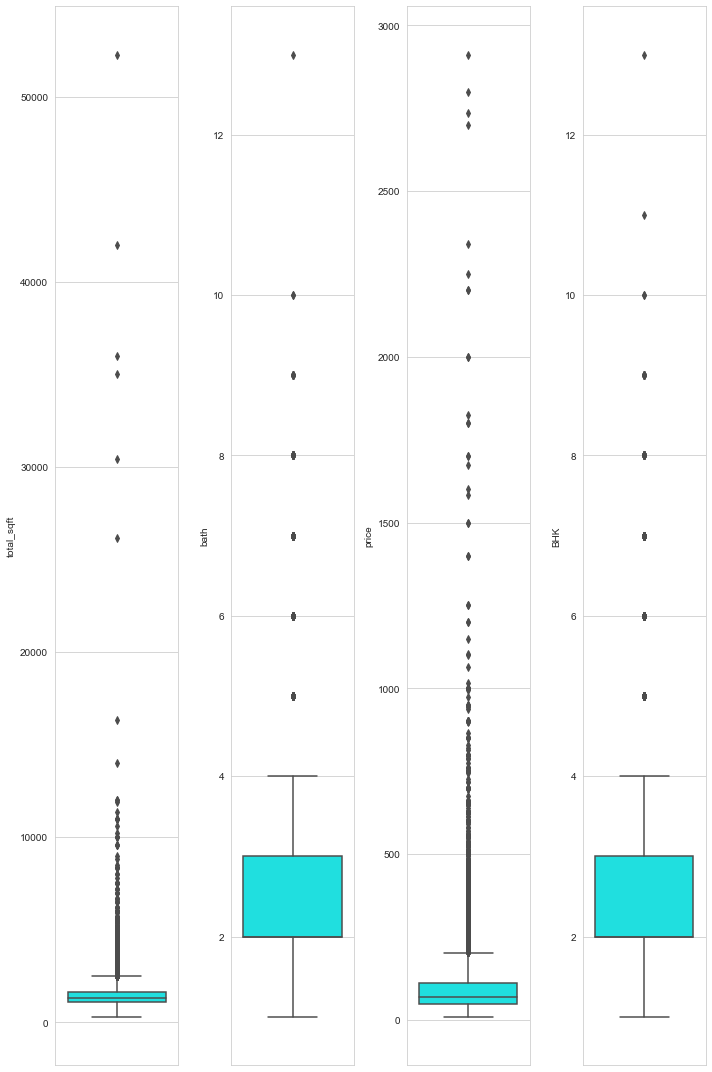

In [49]:
df1=df[['total_sqft','bath','price','BHK']]

l = df1.columns.values
number_of_columns=4
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(10,15))
for i in range(0,len(l)):
    sns.set_style('whitegrid')
    plt.subplot(1,4,i+1)
    
    sns.boxplot(y=df1[l[i]],color='cyan',orient='v')
    
    plt.tight_layout()

In [50]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
    
df = remove_pps_outliers(df)
df.shape

(9761, 7)

In [51]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df = remove_bhk_outliers(df)
df.shape

(5549, 7)

Text(0, 0.5, 'Count')

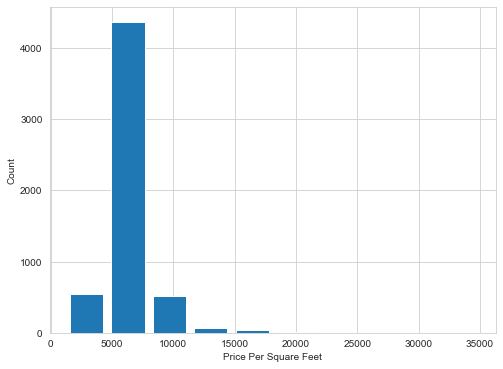

In [52]:


plt.subplots(figsize=(8,6))
plt.hist(df.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [53]:
df = df[df.bath<df.BHK+2]

In [54]:
df.shape

(5490, 7)

Text(0, 0.5, 'No. of houses')

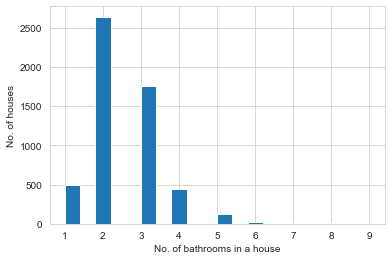

In [55]:
plt.hist(df.bath,bins=20)
plt.xlabel('No. of bathrooms in a house')
plt.ylabel('No. of houses')


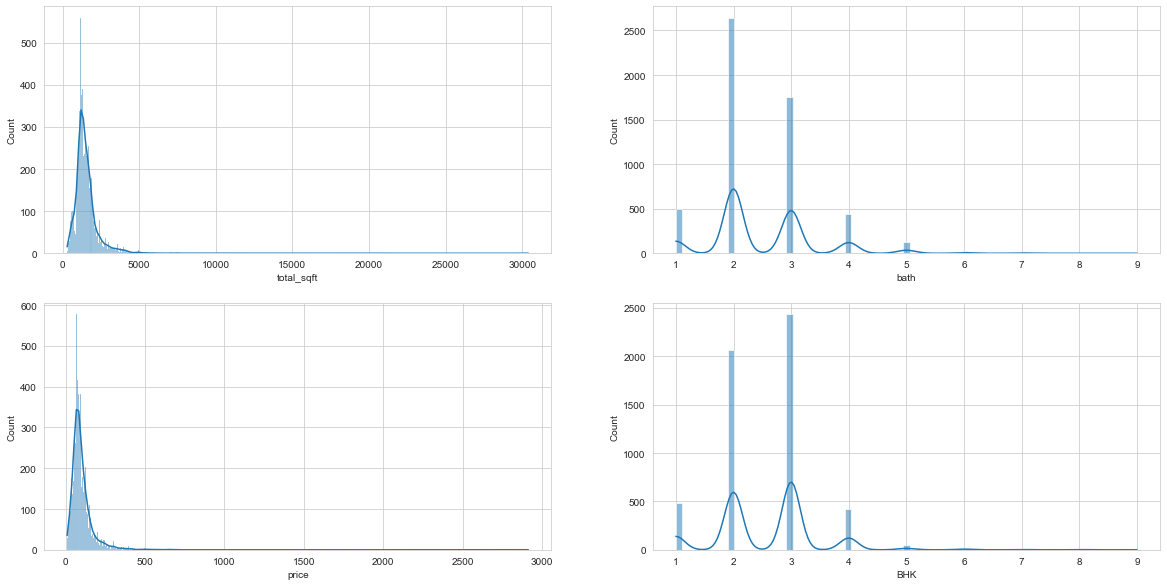

In [56]:
plt.figure(figsize=(20,10))
for i in range(0,len(l)):
    plt.subplot(2,2,i+1)
    sns.histplot(df[l[i]],kde=True) 

# **Converting 'Object' values of Location into Numerical **

In [57]:
dummies = pd.get_dummies(df.location)
dummies

,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Koramangala,1st Stage Indira Nagar,2nd Block Hrbr Layout,2nd Block Jayanagar,2nd Phase JP Nagar,2nd Stage Arekere Mico Layout,3rd Block Banashankari,...,Volagerekallahalli,"Whitefield,",Wilson Garden,Yarandahalli,Yemlur,frazertown,manyata park,other,south,tc.palya
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
df=pd.concat([df,dummies.drop('other',axis='columns')],axis='columns')

In [59]:
df.head()

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,...,Vivek Nagar,Volagerekallahalli,"Whitefield,",Wilson Garden,Yarandahalli,Yemlur,frazertown,manyata park,south,tc.palya
0,1st Block BEL Layout,1540.0,3.0,2.0,85.0,3,5519.480519,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block HBR Layout,600.0,1.0,0.0,45.0,1,7500.000000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block HBR Layout,3150.0,4.0,2.0,150.0,4,4761.904762,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block HRBR Layout,1250.0,2.0,1.0,67.0,2,5360.000000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Koramangala,1415.0,2.0,3.0,110.0,2,7773.851590,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df=df.drop('location',axis='columns')

In [61]:
df.head()

,total_sqft,bath,balcony,price,BHK,price_per_sqft,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Koramangala,...,Vivek Nagar,Volagerekallahalli,"Whitefield,",Wilson Garden,Yarandahalli,Yemlur,frazertown,manyata park,south,tc.palya
0,1540.0,3.0,2.0,85.0,3,5519.480519,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,600.0,1.0,0.0,45.0,1,7500.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3150.0,4.0,2.0,150.0,4,4761.904762,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1250.0,2.0,1.0,67.0,2,5360.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1415.0,2.0,3.0,110.0,2,7773.851590,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# **Model building: Taking input as X and Y**

In [82]:
X=df.drop("price",axis='columns')
y=df.price
print(X.head())
m1=['Linear Regression','Lasso','Ridge','SVR','Decision Tree','Random Forest']
acc2=[]


   total_sqft  bath  balcony  BHK  price_per_sqft  1st Block BEL Layout  \
0      1540.0   3.0      2.0    3     5519.480519                     1   
1       600.0   1.0      0.0    1     7500.000000                     0   
2      3150.0   4.0      2.0    4     4761.904762                     0   
3      1250.0   2.0      1.0    2     5360.000000                     0   
4      1415.0   2.0      3.0    2     7773.851590                     0   

   1st Block HBR Layout  1st Block HRBR Layout  1st Block Koramangala  \
0                     0                      0                      0   
1                     1                      0                      0   
2                     1                      0                      0   
3                     0                      1                      0   
4                     0                      0                      1   

   1st Stage Indira Nagar  ...  Vivek Nagar  Volagerekallahalli  Whitefield,  \
0                       0  ...

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#  a).Applying linear regression

In [84]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
y_pred1 = lr_clf.predict(X_test)

acc2.append(r2_score(y_test, y_pred1))



# b).Lasso for L1 regularisation

In [85]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=100,max_iter=100,tol=0.1)
lasso_reg.fit(X_train,y_train)
y_pred2 = lasso_reg.predict(X_test)

acc2.append(r2_score(y_test, y_pred2))

# c). Ridge for L2 regularisation

In [86]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=100,max_iter=100,tol=0.1)
ridge_reg.fit(X_train,y_train)
y_pred3 = ridge_reg.predict(X_test)

acc2.append(r2_score(y_test, y_pred3))

# d). Applying Support Vector Regression

In [87]:
y1=df.iloc[:,3].apply(int)
y1=y1.values
y1=y1.reshape(-1,1)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X1 = sc_X.fit_transform(X)
y1 = sc_y.fit_transform(y1)


In [88]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X1,np.ravel(y1))


SVR()

In [89]:
y_pred4 = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
# Evaluating the Model Performance
from sklearn.metrics import r2_score
acc2.append(r2_score(y_test, y_pred4))

# e).Applying Decision Tree 

In [90]:
# Training the Decision Tree Regression model on the Training set
from sklearn.tree import DecisionTreeRegressor
reg_dtr = DecisionTreeRegressor(random_state = 70)
reg_dtr.fit(X_train, y_train)

# Predicting the Test set results
y_pred5 = reg_dtr.predict(X_test)

# Evaluating the Model Performance
acc2.append(r2_score(y_test, y_pred5))

# f).**Applying Random Forest Regressor model**

In [91]:
rf_clf=RandomForestRegressor()
rf_clf.fit(X_train,y_train)
rf_Y_pred6=rf_clf.predict(X_test)
rf_score=r2_score(y_test,rf_Y_pred6)
print(rf_score)

0.9687523723514812


In [73]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
for i in range(1,40,1):
  print(f"With {i*10} estimators:")
  clf2=RandomForestRegressor(n_estimators=i*10,max_depth=i,random_state=i).fit(X_train,y_train)
  print(f"Accuracy: {clf2.score(X_test,y_test)*100:2f}%")

With 10 estimators:
Accuracy: 32.344169%
With 20 estimators:
Accuracy: 69.908789%
With 30 estimators:
Accuracy: 81.114736%
With 40 estimators:
Accuracy: 89.418342%
With 50 estimators:
Accuracy: 95.869130%
With 60 estimators:
Accuracy: 96.123388%
With 70 estimators:
Accuracy: 98.394930%
With 80 estimators:
Accuracy: 98.586798%
With 90 estimators:
Accuracy: 96.903276%
With 100 estimators:
Accuracy: 93.913432%
With 110 estimators:
Accuracy: 98.780508%
With 120 estimators:
Accuracy: 98.478475%
With 130 estimators:
Accuracy: 97.793480%
With 140 estimators:
Accuracy: 98.088325%
With 150 estimators:
Accuracy: 98.734694%
With 160 estimators:
Accuracy: 95.216819%
With 170 estimators:
Accuracy: 98.650546%
With 180 estimators:
Accuracy: 98.108360%
With 190 estimators:
Accuracy: 97.829342%
With 200 estimators:
Accuracy: 98.569289%
With 210 estimators:
Accuracy: 98.644065%
With 220 estimators:
Accuracy: 98.623389%
With 230 estimators:
Accuracy: 98.487427%
With 240 estimators:
Accuracy: 98.464556%
W

In [92]:
RF_clf2=RandomForestRegressor(n_estimators=110,max_depth=11,random_state=11)
RF_clf2.fit(X_train,y_train)
RF2_Y_pred7=RF_clf2.predict(X_test)
RF2_score=r2_score(y_test,RF2_Y_pred7)
acc2.append(RF2_score)

In [93]:
mean_squared_error(y_test,RF2_Y_pred7)

71.85652446950738

In [94]:
df1=pd.DataFrame({'Actual': y_test,'Predicted': RF2_Y_pred7})
df1

,Actual,Predicted
8086,58.00,57.815527
34,240.00,240.220644
8,500.00,484.337662
6287,192.00,185.712349
8336,204.00,202.074612
...,...,...
2542,30.00,29.466674
7360,76.18,76.718765
2444,135.00,134.301413
4644,65.00,65.130019


['Linear Regression',
 'Lasso',
 'Ridge',
 'SVR',
 'Decision Tree',
 'Random Forest']

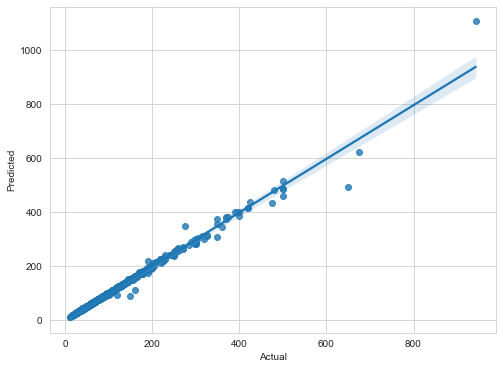

In [95]:
fig,ax = plt.subplots(figsize=(8,6))
sns.regplot(x='Actual',y='Predicted',data=df1)
m1

# Model to be selected

In [96]:

model1=pd.DataFrame({'model':m1,'accuracy':  acc2 })
model1

,model,accuracy
0,Linear Regression,0.922213
1,Lasso,0.923633
2,Ridge,0.923802
3,SVR,0.708187
4,Decision Tree,0.928097
5,Random Forest,0.987805


In [97]:
print(X.columns)

Index(['total_sqft', 'bath', 'balcony', 'BHK', 'price_per_sqft',
       '1st Block BEL Layout', '1st Block HBR Layout', '1st Block HRBR Layout',
       '1st Block Koramangala', '1st Stage Indira Nagar',
       ...
       'Vivek Nagar', 'Volagerekallahalli', 'Whitefield,', 'Wilson Garden',
       'Yarandahalli', 'Yemlur', 'frazertown', 'manyata park', 'south',
       'tc.palya'],
      dtype='object', length=510)


# Prediction

In [98]:
def predict_price_ridge(location,sqft,bath,balcony,bhk):    
    
    loc_index = np.where(df.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    if loc_index >0:
        x[loc_index] = 1

    return ridge_reg.predict([x])[0]

In [99]:
def predict_price_lasso(location,sqft,bath,balcony,bhk):    
    
    loc_index = np.where(df.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    if loc_index >0:
        x[loc_index] = 1

    return lasso_reg.predict([x])[0]

In [101]:
predict_price_lasso('Yemlur',2500, 2,2,3)


33.97060900630626

In [103]:
def predict_price_dtr(location,sqft,bath,balcony,bhk):    
    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    if loc_index >0:
        x[loc_index] = 1

    return reg_dtr.predict([x])[0]

In [104]:
predict_price_dtr('Yemlur',1000, 2, 2,3)


28.18

In [105]:
print('Lenght of training data:',len(X_train))
print('Lenght of testing data:',len(X_test))
X_test

Lenght of training data: 4392
Lenght of testing data: 1098


,total_sqft,bath,balcony,BHK,price_per_sqft,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Koramangala,1st Stage Indira Nagar,...,Vivek Nagar,Volagerekallahalli,"Whitefield,",Wilson Garden,Yarandahalli,Yemlur,frazertown,manyata park,south,tc.palya
8086,1100.0,2.0,1.0,2,5272.727273,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,2005.0,3.0,2.0,3,11970.074813,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3000.0,5.0,3.0,4,16666.666667,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6287,2273.0,4.0,2.0,3,8446.986362,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,2732.0,4.0,3.0,4,7467.057101,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,765.0,2.0,2.0,1,3921.568627,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7360,1384.0,2.0,2.0,3,5504.335260,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2444,1700.0,3.0,3.0,3,7941.176471,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4644,1265.0,2.0,1.0,3,5138.339921,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [107]:
model = Sequential()

# input layer
model.add(Input(shape=(510,)))

# hidden layers
model.add(Dense(20,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))


# output layer
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam',loss='mse')

In [108]:
model.fit(x=X_train,y=y_train.values,validation_data=(X_test,y_test.values),batch_size=50,epochs=100)


Epoch 1/100
88/88 [==============================] - 0s 5ms/step - loss: 14338.6045 - val_loss: 4887.7207
Epoch 2/100
88/88 [==============================] - 0s 2ms/step - loss: 6062.7266 - val_loss: 4287.7974
Epoch 3/100
88/88 [==============================] - 0s 2ms/step - loss: 5039.3647 - val_loss: 2979.1335
Epoch 4/100
88/88 [==============================] - 0s 2ms/step - loss: 3670.6404 - val_loss: 2101.5854
Epoch 5/100
88/88 [==============================] - 0s 2ms/step - loss: 2893.9465 - val_loss: 1796.6582
Epoch 6/100
88/88 [==============================] - 0s 2ms/step - loss: 2283.2700 - val_loss: 1476.1991
Epoch 7/100
88/88 [==============================] - 0s 2ms/step - loss: 1843.7770 - val_loss: 1318.9088
Epoch 8/100
88/88 [==============================] - 0s 2ms/step - loss: 1421.8215 - val_loss: 1112.8605
Epoch 9/100
88/88 [==============================] - 0s 2ms/step - loss: 1100.3401 - val_loss: 1025.7505
Epoch 10/100
88/88 [==============================] - 

In [109]:
y_predicted = model.predict(X_test)

print('r2 score:',r2_score(y_test,y_predicted))

r2 score: 0.9157906339577443


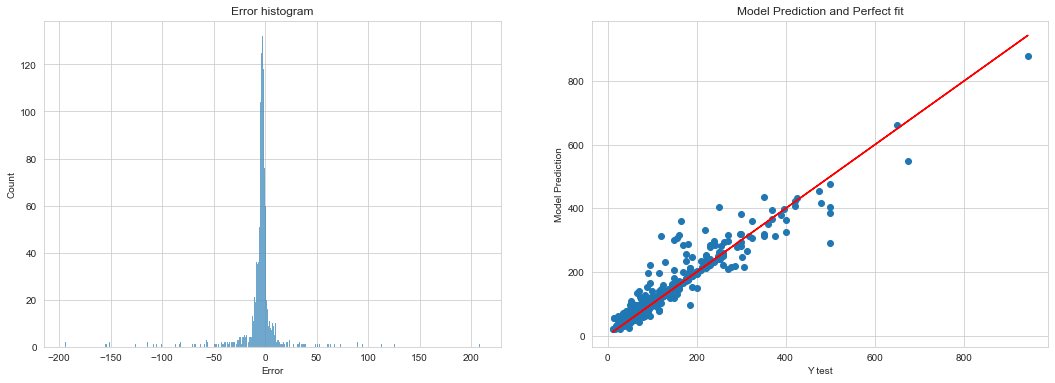

In [110]:

fig,ax = plt.subplots(ncols=2,figsize=(18,6))

y_test_values = y_test.values
y_predicted_values = y_predicted.reshape(len(y_predicted))
errors = y_test_values - y_predicted_values

sns.histplot(errors,ax=ax[0])
ax[0].set_title('Error histogram')
ax[0].set_xlabel('Error')

ax[1].scatter(y_test_values,y_predicted_values)
ax[1].plot(y_test_values,y_test_values,'r')
ax[1].set_title('Model Prediction and Perfect fit')
ax[1].set_xlabel('Y test')
ax[1].set_ylabel('Model Prediction')
plt.show()

In [111]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                10220     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_6 (Dense)              (None, 30)                9